In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
I_maglim = [38803,   39181,   39431,   39619,   40005,   40107,   40588,   40604,
   41567,   41829,   42768, 5807403, 5057729,   37814]
I_maglim += [38803, 39181, 39431, 40005, 40107, 40147, 41567, 42768, 14548, 14590]

In [3]:
########################################################
def genCluster(table, reject=[], weird=[], clusterName='', 
               nest='NEST_100001', ctl=None):
    
    if ctl is None:
        ctl   = np.genfromtxt(nest+'.csv' , delimiter='|', filling_values=-1, 
                              names=True, dtype=None, encoding=None)
    PGC = ctl['PGC']
    
    pgc  = table['pgc']
    Vhel = table['Vhel']
    Vls  = table['Vls']
   
    pgc_ = []
    Vhel_ = []
    Vls_ = []
    
    for i, idd in enumerate(pgc):
        if idd in PGC and not idd in reject: # and not idd in I_maglim:
            pgc_.append(pgc[i])
            Vhel_.append(Vhel[i])
            Vls_.append(Vls[i])
    
    Vhel_ = np.asarray(Vhel_)
    Vls_ = np.asarray(Vls_)
            

    outDict = {'pgc':pgc_, 'name': clusterName, 'Vhel': Vhel_, 'Vls': Vls_}
    
    return outDict
########################################################
def clusters4Vmod(table):
    
    Clusters = {}
    
    addSouth=True

    reject = [43164,44405,93666]
    weird = [43511]
    myDict = genCluster(table, nest='NEST_100001', clusterName='Coma', 
                        reject=reject, weird=weird)
    Clusters['NEST_100001'] = myDict

    reject = []
    weird = [41440, 40809]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Virgo', nest='NEST_100002')
    Clusters['NEST_100002'] = myDict


    ### SOUTH
    if addSouth:
        reject = []
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Centaurus', nest='NEST_100003')
        Clusters['NEST_100003'] = myDict

    reject = [36323,36328,36330,36608,200155]
    weird = [37140]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 1367', nest='NEST_100005')
    Clusters['NEST_100005'] = myDict


    ### SOUTH
    if addSouth:
        reject = []
        weird = [31500]
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Hydra', nest='NEST_100006')
        Clusters['NEST_100006'] = myDict

    reject = [56977,2790835]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 2151 (Hercules)', nest='NEST_100007')
    Clusters['NEST_100007'] = myDict


    reject = [37550]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Ursa Major', nest='NEST_100008')
    Clusters['NEST_100008'] = myDict

    ### SOUTH
    if addSouth:
        reject = []
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Antlia', nest='NEST_100014')
        Clusters['NEST_100014'] = myDict

    reject = [38333]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC4065', nest='NEST_100018')
    Clusters['NEST_100018'] = myDict

    reject = [23308]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Cancer', nest='NEST_100030')
    Clusters['NEST_100030'] = myDict

    #reject = [39655] 
    #weird = []
    #myDict = genCluster(table, reject=reject, weird=weird, 
               #clusterName='Virgo W', nest='NEST_120002')
    #Clusters['NEST_120002'] = myDict

    reject = [] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 262', nest='NEST_200003')
    Clusters['NEST_200003'] = myDict

    reject = [3446,4020] 
    weird = [1904373]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC410', nest='NEST_200005')
    Clusters['NEST_200005'] = myDict

    reject = [4740,4876,5008] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC507', nest='NEST_200006')
    Clusters['NEST_200006'] = myDict

    ### SOUTH
    if addSouth:
        reject = [] 
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Fornax', nest='NEST_200015')
        Clusters['NEST_200015'] = myDict

    reject = [11150,11199,138562,3647754] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 400', nest='NEST_200012')
    Clusters['NEST_200012'] = myDict

    reject = [85526,85643,90431,197699] 
    weird = [5057398]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 2634/66', nest='NEST_200016')
    Clusters['NEST_200016'] = myDict

    ### SOUTH
    if addSouth:
        reject = [] 
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Abell 539', nest='NEST_200017')
        Clusters['NEST_200017'] = myDict

    reject = [1724] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC70', nest='NEST_200037')
    Clusters['NEST_200037'] = myDict

    reject = [90474] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC80', nest='NEST_200045')
    Clusters['NEST_200045'] = myDict

    reject = [70712, 70998, 71360] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Pegasus', nest='NEST_200092')
    Clusters['NEST_200092'] = myDict
    
    return Clusters
########################################################

In [4]:
table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

Vmod_Clusters = clusters4Vmod(table)

In [5]:
table   = np.genfromtxt('../EDD_distance_cf4_v27.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

ID  = table['pgc']
RA  = table['ra']
DEC = table['dec']
GL  = table['gl']
GB  = table['gb']
SGL = table['sgl']
SGB = table['sgb']
VHEL = table['Vhel']
VLS  = table['Vls']

In [6]:
def Vh2V3k(el,b, Vh):
  
    alpha = np.pi / 180.
    cosb = np.cos(b*alpha)
    sinb = np.sin(b*alpha)
    cosl = np.cos(el*alpha)
    sinl = np.sin(el*alpha)
    
    v3k = float(Vh)-25.2*cosl*cosb-245.7*sinl*cosb+276.8*sinb

    return v3k

c Galactic coordinates l,b
        cosb=cos(b*0.017453)
        sinb=sin(b*0.017453)
        cosl=cos(el*0.017453)
        sinl=sin(el*0.017453)
c Fixsen et al. 1996 (CMB)
        v3k=float(ivh)-25.2*cosl*cosb-245.7*sinl*cosb+276.8*sinb
c Tully 2008 (Local Sheet)
        vls=float(ivh)-26.*cosl*cosb+317.*sinl*cosb-8.*sinb
c van der Marel 2012 (GSR)
        vgsrm=float(ivh)+11.1*cosl*cosb+251.*sinl*cosb+7.25*sinb
c Cosmological adjustments to CMB velocities; vanilla LCDM model 
      omegam=0.27
      omegal=1.-omegam
      c=299800.
        z=v3k/c
      q0=0.5*(omegam-2.*omegal)
      fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
      vmod=c*z*fmod
c

In [7]:
import astropy.stats as st


def getVmod(Vmod_Clusters, key):
    
#     key = 'NEST_100002'


    Vls = Vmod_Clusters[key]['Vls']
    Vhel = Vmod_Clusters[key]['Vhel']
    pgc = Vmod_Clusters[key]['pgc']

    N = len(pgc)
    ra  = np.zeros(N)
    dec = np.zeros(N)
    gl  = np.zeros(N)
    gb  = np.zeros(N)
    sgl = np.zeros(N)
    sgb = np.zeros(N)
    V3k = np.zeros(N)
    Vmod_lst = np.zeros(N)

    for i, idd in enumerate(pgc):

        if idd in ID:
            indx, = np.where(ID==idd)
            j = indx[0]

            ra[i]  = RA[j]
            dec[i] = DEC[j]
            gl[i]  = GL[j]
            gb[i]  = GB[j]
            sgl[i] = SGL[j]
            sgb[i] = SGB[j]
            V3k[i] = Vh2V3k(GL[j],GB[j], VHEL[j])
            
            omegam=0.27
            omegal=1.-omegam
            c=299800.
            z=V3k[i]/c
            q0=0.5*(omegam-2.*omegal)
            fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
            Vmod_lst[i]=c*z*fmod
            
            print idd, ra[i], dec[i], gl[i] ,gb[i], Vhel[i], VHEL[j], Vmod_lst[i], V3k[i], Vls[i]

    print np.median(V3k), np.median(Vmod_lst), st.biweight_location(Vmod_lst)
    
    Vls_m = st.biweight_location(Vls)
    Vls_m_e = np.sqrt(st.biweight_midvariance(Vls))/np.sqrt(len(Vls))

    V3k_m = st.biweight_location(V3k, c=6)
    V3k_m_e = np.sqrt(st.biweight_midvariance(V3k))/np.sqrt(len(V3k))


    omegam=0.27
    omegal=1.-omegam
    c=299800.
    z=V3k_m/c
    ze = V3k_m_e/c
    q0=0.5*(omegam-2.*omegal)
    fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
    Vmod=c*z*fmod
    Vmod_e=c*ze*fmod

#     print Vls_m, Vls_m_e, V3k_m, V3k_m_e, Vmod, Vmod_e
    return Vmod, Vmod_e, V3k_m, V3k_m_e, Vls_m, Vls_m_e


In [8]:
Ntable   = np.genfromtxt('Neil_data.csv' , delimiter=',', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_neil = Ntable['PGC']
Sample   = Ntable['Sample']
Sample = np.asarray([s.strip() for s in Sample])

pgc_cluster =  pgc_neil[np.where(Sample=='A400')]
print len(pgc_cluster)
Ndict = genCluster(table, clusterName='Neil_Pegasus', ctl={'PGC': pgc_cluster})


# for i, idd in enumerate(Ndict['pgc']):
#     print idd, Ndict['Vhel'][i]



print getVmod({'dummy': Ndict}, 'dummy')

# print getVmod(Vmod_Clusters, 'NEST_200012')
# print len(Vmod_Clusters['NEST_200012']['pgc'])

# idd, ra[i], dec[i], gl[i] ,gb[i], Vhel[i], VHEL[j], V3k[i], Vls

9
10913 43.3396 6.5395 168.6322 -45.2409 5429.0 5429.0 5287.709604421878 5215.74733271641 5496.6
10943 43.5146 6.2578 169.0791 -45.3447 7610.0 7610.0 7542.202318176797 7397.773347850059 7675.8
11074 43.99 6.4948 169.3718 -44.8582 7696.0 7696.0 7634.08025926372 7486.19228308907 7761.2
11102 44.0946 6.1552 169.7958 -45.0483 7773.0 7773.0 7714.838354629836 7563.87776967483 7836.4
11136 44.1954 4.9779 171.0096 -45.8677 7703.0 7703.0 7643.159490302808 7494.927580098611 7761.1
11255 44.6242 6.3063 170.2165 -44.5892 6714.0 6714.0 6619.503691859498 6507.633438015859 6776.2
11306 44.8183 7.3052 169.5079 -43.7079 7623.0 7623.0 7562.4948258396635 7417.3052487996765 7688.7
74257 44.4254 5.4323 170.823 -45.3758 7585.0 7585.0 7521.601347445841 7377.942594461647 7644.2
7407.539298324868 7552.34857200823 7598.804157336931
(7598.7952426603015, 33.95885678216031, 7452.240292118526, 33.30390577779263, 7723.615271807849, 32.627439051416374)


In [9]:
Vmod_Dict = {}

for key in Vmod_Clusters:
    Vmod, Vmod_e, Vcmb, Vcmb_e, Vls, Vls_e = getVmod(Vmod_Clusters, key)
    name = Vmod_Clusters[key]['name']
    print key, name, '%.0f'%Vmod, '%.0f'%Vmod_e
    
    Vmod_Dict[name] = [Vmod, Vmod_e, Vcmb, Vcmb_e, Vls, Vls_e]

70702 348.2138 5.806 83.3802 -49.3441 3490.0 3490.0 3144.9003971383167 3119.1069336204077 3699.3
70803 348.6883 5.4129 83.636 -49.936 3640.0 3640.0 3297.522225907477 3269.191354787587 3847.0
70812 348.7387 9.9951 87.4369 -46.1214 4314.0 4314.0 3984.7612380961837 3943.566345544385 4538.5
70880 349.0054 6.6524 85.1041 -49.0832 3513.0 3513.0 3168.2614458361527 3142.087157085329 3724.5
70927 349.2729 7.1228 85.8334 -48.8335 3592.0 3592.0 3248.6204979607683 3221.1153373640404 3804.9
70974 349.4663 7.4301 86.3293 -48.6777 3754.0 3754.0 3413.491309576314 3383.154505107471 3967.8
71034 349.7192 6.8772 86.2011 -49.279 4206.0 4206.0 3874.155012816115 3835.188723018863 4417.3
71049 349.7958 10.8024 89.3188 -45.962 3824.0 3824.0 3485.642055227895 3454.0233774826875 4049.9
71051 349.7983 8.1093 87.2932 -48.2758 4182.0 4182.0 3849.7570173834224 3811.2741782377584 4397.9
71052 349.7946 7.7038 86.9672 -48.6189 3779.0 3779.0 3439.0188477422407 3408.2314733110206 3993.4
71055 349.8138 8.3501 87.5014 -48

31094 157.9821 -35.4098 273.3369 19.3215 2705.0 2705.0 3050.958185728858 3026.6685004155624 2402.0
31097 158.0092 -33.6232 272.3265 20.8354 3936.0 3936.0 4311.0618475345855 4262.940828845609 3636.1
31273 158.5792 -34.4034 273.2013 20.4334 2616.0 2616.0 2964.1374886040994 2941.19816858978 2315.0
31493 159.2204 -32.3484 272.5083 22.4567 2830.0 2830.0 3188.0641443949676 3161.564895414901 2533.0
31761 160.0858 -36.411 275.4308 19.3642 2748.0 2748.0 3093.2504064049263 3068.2892108929423 2445.0
31875 160.5008 -36.9352 276.0162 19.0813 3184.0 3184.0 3535.432152087417 3502.9137443514983 2881.0
3161.564895414901 3188.0641443949676 3156.5196333320587
NEST_100014 Antlia 3156 64
6059 24.5775 35.3649 133.6002 -26.534 4925.0 4925.0 4715.1280665719605 4657.706329146349 5150.0
6137 24.88 33.8244 134.231 -27.9902 4841.0 4841.0 4626.467849621 4571.155204974275 5061.3
6138 24.8879 35.1599 133.9245 -26.6827 5163.0 5163.0 4959.638709608914 4896.202159394907 5386.7
6189 25.1163 34.6254 134.2559 -27.1659 552

42880 191.04 -36.511 301.3 26.3377 3317.0 3317.0 3650.871997274598 3616.2200769117253 3059.0
43170 191.8762 -39.5708 302.1066 23.2947 4631.0 4631.0 4983.354236754314 4919.318850144516 4369.0
43444 192.5829 -44.426 302.7236 18.4454 2295.0 2295.0 2583.205560348686 2565.742003996072 2026.0
43717 193.2104 -40.4516 303.2208 22.4194 3836.0 3836.0 4163.7417561381435 4118.812681535165 3575.0
43744 193.2562 -39.8354 303.2629 23.0354 2877.0 2877.0 3188.156561880372 3161.655791732097 2617.0
43893 193.5762 -41.8206 303.5042 21.048 3374.0 3374.0 3686.9695719495926 3651.6369164295884 3111.0
43994 193.755 -40.9707 303.6608 21.896 4203.0 4203.0 4536.222060763138 4483.01683014945 3942.0
44851 195.2579 -35.9315 305.1095 26.8997 4753.0 4753.0 5111.88373399138 5044.555462901667 4504.8
3468.3990104583836 3500.280937980152 3472.078103983096
NEST_100003 Centaurus 3473 150
38627 182.3537 13.5745 264.941 73.2654 1977.0 1977.0 2327.3866379480346 2313.1880190853144 1879.0
38684 182.4771 13.0497 266.2838 72.8951 

1382 5.3708 22.5059 113.91 -39.8405 5813.0 5813.0 5550.201136186579 5471.043475827689 6048.7
1422 5.5633 20.6079 113.7645 -41.7438 5663.0 5663.0 5393.320831386894 5318.503415583991 5892.6
1520 5.9863 24.3057 114.9607 -38.14 5708.0 5708.0 5446.497146128761 5370.221810469511 5947.6
1553 6.1821 21.101 114.6241 -41.3394 5364.0 5364.0 5088.065907589067 5021.353879441413 5593.8
1817 7.4321 21.4769 116.2232 -41.1119 5600.0 5600.0 5333.5140217666185 5260.320050582464 5828.2
1662109 5.4492 22.0268 113.9093 -40.3251 5838.0 5838.0 5575.281203834981 5495.418719419902 6072.1
1673166 4.0933 22.6161 112.42 -39.54 5788.0 5788.0 5522.41997871084 5444.039526899862 6026.7
1673342 4.4021 22.6269 112.7876 -39.5776 5612.0 5612.0 5341.995582321609 5268.57242905296 5850.1
1707532 4.6504 24.4489 113.46 -37.82 5776.0 5776.0 5514.305273510257 5436.151140274721 6018.8
2816236 5.1025 21.8764 113.46 -40.42 5852.0 5852.0 5588.81658552219 5508.572463079952 6086.5
5057659 4.7308 24.1631 113.49 -38.11 5984.0 5984.0 572

91822 356.9867 28.1311 106.2802 -32.6793 9247.0 9247.0 9113.91271471225 8904.977190215808 9513.6
169661 354.1929 26.6626 102.922 -33.2913 8784.0 8784.0 8624.228304287693 8436.598913893222 9051.5
169662 357.0071 27.6234 106.1253 -33.1704 8304.0 8304.0 8127.991829227158 7960.841677122872 8569.3
1758561 355.5038 25.9981 103.9914 -34.3074 9277.0 9277.0 9139.148927504008 8929.08601525642 9540.8
1778403 358.2483 26.4945 107.0201 -34.5649 8226.0 8226.0 8045.417952711623 7881.566246908717 8486.4
1789145 356.2071 26.8144 105.0222 -33.7301 7775.0 7775.0 7575.034519249673 7429.373974331282 8039.7
1804303 353.4188 27.3166 102.4206 -32.439 9163.0 9163.0 9021.418140235786 8816.590115325012 9433.3
1809186 356.3263 27.4725 105.3831 -33.1355 9200.0 9200.0 9062.570597617416 8855.919839378068 9466.1
1823684 357.4229 28.0053 106.6761 -32.9098 8941.0 8941.0 8793.976235034432 8599.084081499079 9206.5
1831130 355.5717 28.2732 104.9221 -32.1687 8740.0 8740.0 8583.04027505128 8397.153407573333 9009.2
4126721 3

In [10]:
Vmod_Dict

{'Abell 1367': [7073.3534256320745,
  70.94210246778677,
  6945.965346000856,
  69.66446544690442,
  6541.9644489713755,
  70.63873852096543],
 'Abell 2151 (Hercules)': [11227.72249661027,
  222.50888534256967,
  10914.528074962864,
  216.3020574059766,
  10914.551182253517,
  215.45054715082142],
 'Abell 262': [4716.684040350191,
  69.79820089500711,
  4659.224946499911,
  68.9479125692474,
  5132.090682261045,
  68.96984959130818],
 'Abell 2634/66': [8454.346007696955,
  131.29278058752385,
  8273.854000270725,
  128.48980830471933,
  8887.115861394797,
  128.3988353846352],
 'Abell 400': [7623.444501410337,
  104.0316685230432,
  7475.958937809987,
  102.01903902707622,
  7748.9162351017185,
  101.1288793154047],
 'Abell 539': [8953.365339576721,
  114.84483383417911,
  8751.534746977864,
  112.25595244818113,
  8691.002740658812,
  112.42835966332383],
 'Antlia': [3156.4649826174873,
  63.75939714793812,
  3130.4833384546782,
  63.23457777631334,
  2505.0709176826776,
  64.13347648

In [11]:
def add2Dict0(myDict, code, band, Mlim):
    
    if not code in myDict:
        myDict[code]={}
    myDict[code][band]= Mlim
    



def add2Dict(myDict, code, band, param, DM):
    
    if not code in myDict:
        myDict[code]={}
    if not band in myDict[code]:
        myDict[code][band]={}
    if not param in myDict[code][band]:
        myDict[code][band][param]={}
    myDict[code][band][param] = DM
##############################################   
table   = np.genfromtxt('cluster_code_Mlimit_revised.csv' , delimiter=',', 
                        filling_values=0, names=True, dtype=None, encoding=None)

mag_lims_u = table['u']
mag_lims_g = table['g']
mag_lims_r = table['r']
mag_lims_i = table['i']
mag_lims_z = table['z']
mag_lims_w1 = table['w1']
mag_lims_w2 = table['w2']
code = table['Code']  
Mlim_dict = {} 

for i, myCode in enumerate(code):
    myCode = myCode.strip()
    add2Dict0(Mlim_dict, myCode, 'u', mag_lims_u[i])
    add2Dict0(Mlim_dict, myCode, 'g', mag_lims_g[i])
    add2Dict0(Mlim_dict, myCode, 'r', mag_lims_r[i])
    add2Dict0(Mlim_dict, myCode, 'i', mag_lims_i[i])
    add2Dict0(Mlim_dict, myCode, 'z', mag_lims_z[i])
    add2Dict0(Mlim_dict, myCode, 'w1', mag_lims_w1[i])
    add2Dict0(Mlim_dict, myCode, 'w2', mag_lims_w2[i])
    
##############################################
table   = np.genfromtxt('cluster_DM_code.csv' , delimiter=',', 
                        filling_values=0, names=True, dtype=None, encoding=None)
DM_band = table['band']
DM_param = table['param']
DM_code = table['Code']
DM_cluster = table['Cluster']
DM_Ngal = table['Ngal']
DM = table['DM']
DMe = table['DMe']
##############################################
    
DM_Dict = {}    
for i, myCode in enumerate(DM_code):
    add2Dict(DM_Dict, myCode.strip(), DM_band[i].strip(), DM_param[i].strip(), np.float(DM[i]))  

In [12]:
table   = np.genfromtxt('band_gamma_rho.csv' , delimiter=',', 
                        filling_values=0, names=True, dtype=None, encoding=None)
band = table['band'] 
param = table['param'] 
rho = table['rho'] 
gamma = table['gamma'] 
gamma_rho_dict = {} 

for i, myband in enumerate(band):
    myband = myband.strip()
    add2Dict0(gamma_rho_dict, myband, param[i].strip(),[rho[i], gamma[i]])

In [13]:
band_Mag_Lims = {}

band_Mag_Lims['u']={}
band_Mag_Lims['u']['a'] = -16.49
band_Mag_Lims['u']['b'] = -16.41
band_Mag_Lims['u']['c'] = -16.41

band_Mag_Lims['g']={}
band_Mag_Lims['g']['a'] = -16.75

band_Mag_Lims['r']={}
band_Mag_Lims['r']['a'] = -16.90

band_Mag_Lims['i']={}
band_Mag_Lims['i']['a'] = -17.

band_Mag_Lims['z']={}
band_Mag_Lims['z']['a'] = -17.

band_Mag_Lims['w1']={}
band_Mag_Lims['w1']['a'] = -15.98
band_Mag_Lims['w1']['b'] = -15.98
band_Mag_Lims['w1']['c'] = -15.98
band_Mag_Lims['w1']['d'] = -15.98


band_Mag_Lims['w2']={}
band_Mag_Lims['w2']['a'] = -15.35
band_Mag_Lims['w2']['b'] = -15.34
band_Mag_Lims['w2']['c'] = -15.35
band_Mag_Lims['w2']['d'] = -15.35

In [14]:
def biasFuc2(M, a, b, Mlim=-17):
    
    if M>Mlim:
        return 0.
    return a*(np.abs(M-Mlim))**b

grandClustersTable = {}

for i, cc in enumerate(DM_code):
    cc = cc.strip()
    band = DM_band[i].strip()
    param = DM_param[i].strip()
    
#     print cc, band, param
    
    Cluster_Mlim = Mlim_dict[cc][band] - DM[i]
    band_lim = band_Mag_Lims[band][param]
    rho_gamma = gamma_rho_dict[band][param]
    rho = rho_gamma[0]
    gamma = rho_gamma[1]
    cluster_bias = biasFuc2(Cluster_Mlim, rho, gamma, Mlim=band_lim)
    
    DM_modified = DM[i]+cluster_bias  
    Vmod_arr = Vmod_Dict[DM_cluster[i].strip()]
    
    
    Vmod = Vmod_arr[0]
    Vmod_e = Vmod_arr[1]
    
    Dmpc = 10**((DM_modified-25.)/5.)
    Dmpc_e = (DMe[i]*Dmpc*np.log(10))/5
    
    H0 = Vmod/Dmpc
    H0e = H0*np.sqrt(Vmod_e**2/Vmod**2 + Dmpc_e**2/Dmpc**2)

    rowDict = {}
    rowDict['name']   = DM_cluster[i]
    rowDict['Ngal']   = DM_Ngal[i]
    rowDict['DMo']    = DM[i]
    rowDict['bias']   = cluster_bias
    rowDict['DM']     = DM_modified
    rowDict['DMe']    = DMe[i]
    rowDict['Dmpc']   = Dmpc
    rowDict['Dmpc_e'] = Dmpc_e
    rowDict['H0']     = H0
    rowDict['H0e']    = H0e
    rowDict['Vmod']   = Vmod
    rowDict['Vmod_e'] = Vmod_e
    rowDict['Vcmb']   = Vmod_arr[2]
    rowDict['Vcmb_e'] = Vmod_arr[3]
    rowDict['Vls']    = Vmod_arr[4]
    rowDict['Vls_e']  = Vmod_arr[5]
    
    
    
    add2Dict(grandClustersTable, cc, band.strip(), param.strip(), rowDict)
    
#     print cc, DM_cluster[i], '&', band, param, DM_Ngal[i], DM[i], '%.3f'%cluster_bias, '%.2f'%DM_modified, DMe[i], '%.2f'%Dmpc, '%.2f'%Dmpc_e, '%.2f'%H0, '%.2f'%H0e 
    
    if param=='d':
        print DM_cluster[i],'|     &   &   '+band.upper()+'  &  TF$_{'+band.upper()+'cur}$ &', DM_Ngal[i], ' & %.2f'%DM[i], ' & %.3f'%cluster_bias, ' & %.2f'%DM_modified+'$\pm$'+'%.2f'% DMe[i], ' & %.2f'%Dmpc+'$\pm$'+'%.2f'%Dmpc_e, ' & %.2f'%H0+'$\pm$'+'%.2f  \\\\'%H0e

   Pegasus     |     &   &   W1  &  TF$_{W1cur}$ & 25  & 33.19  & 0.001  & 33.19$\pm$0.12  & 43.47$\pm$2.40  & 76.65$\pm$4.62  \\
   NGC70     |     &   &   W1  &  TF$_{W1cur}$ & 11  & 34.18  & 0.079  & 34.26$\pm$0.12  & 71.07$\pm$3.93  & 95.11$\pm$5.53  \\
   Abell 539     |     &   &   W1  &  TF$_{W1cur}$ & 22  & 35.03  & 0.099  & 35.13$\pm$0.08  & 106.10$\pm$3.91  & 84.38$\pm$3.29  \\
   NGC410     |     &   &   W1  &  TF$_{W1cur}$ & 31  & 33.91  & 0.005  & 33.92$\pm$0.10  & 60.68$\pm$2.79  & 76.47$\pm$3.77  \\
   NGC507     |     &   &   W1  &  TF$_{W1cur}$ & 22  & 33.82  & 0.046  & 33.87$\pm$0.08  & 59.33$\pm$2.19  & 80.93$\pm$3.65  \\
   Antlia     |     &   &   W1  &  TF$_{W1cur}$ & 17  & 32.66  & 0.016  & 32.68$\pm$0.11  & 34.29$\pm$1.74  & 92.04$\pm$5.02  \\
   Abell 262     |     &   &   W1  &  TF$_{W1cur}$ & 55  & 33.45  & 0.006  & 33.46$\pm$0.13  & 49.11$\pm$2.94  & 96.04$\pm$5.92  \\
   Coma     |     &   &   W1  &  TF$_{W1cur}$ & 75  & 34.62  & 0.003  & 34.62$\pm$0.06  & 

In [15]:
grandClustersTable['He']['w1']['d']

{'DM': 36.0375256593936,
 'DMe': 0.09,
 'DMo': 35.98,
 'Dmpc': 161.25200817097073,
 'Dmpc_e': 6.683336464136962,
 'H0': 69.62841966411884,
 'H0e': 3.1987879744162697,
 'Ngal': 33,
 'Vcmb': 10914.528074962864,
 'Vcmb_e': 216.3020574059766,
 'Vls': 10914.551182253517,
 'Vls_e': 215.45054715082142,
 'Vmod': 11227.72249661027,
 'Vmod_e': 222.50888534256967,
 'bias': 0.05752565939360474,
 'name': u'   Abell 2151 (Hercules)    '}

In [16]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [17]:
def Plot_compareD(ax, band1, band2):
    param1 = 'a'

    param2 = 'a'
    D_av = 0
    D_av_e = 0
    for code in grandClustersTable:
        myCluster = grandClustersTable[code]
        if band1 in myCluster and band2 in myCluster:
            Vmod = myCluster[band1][param1]['Vmod']
            D1  = myCluster[band1][param1]['Dmpc']
            D1e = myCluster[band1][param1]['Dmpc_e']
            D2  = myCluster[band2][param2]['Dmpc']
            D2e = myCluster[band2][param2]['Dmpc_e']
            Delta_D  = D2-D1
            Delta_De = np.sqrt(D1e**2+D2e**2)

            ax.errorbar(Vmod, Delta_D, yerr=Delta_De, fmt='o', color='k')
            
            if Vmod>4000:
                D_av += Delta_D/Delta_De**2
                D_av_e += 1./Delta_De**2
    
    if D_av_e!=0:
        D_av = D_av/D_av_e
        ax.plot([4000,20000], [D_av,D_av], 'k--')    


    param2 = 'b'
    D_av = 0
    D_av_e = 0    
    for code in grandClustersTable:
        myCluster = grandClustersTable[code]
        if band1 in myCluster and band2 in myCluster:

            if param1 in myCluster[band1] and param2 in myCluster[band2]:
                Vmod = myCluster[band1][param1]['Vmod']
                D1  = myCluster[band1][param1]['Dmpc']
                D1e = myCluster[band1][param1]['Dmpc_e']
                D2  = myCluster[band2][param2]['Dmpc']
                D2e = myCluster[band2][param2]['Dmpc_e']
                Delta_D  = D2-D1
                Delta_De = np.sqrt(D1e**2+D2e**2)

                ax.errorbar(Vmod, Delta_D, yerr=Delta_De*0, fmt='s', color='r', markerfacecolor='none')

                if Vmod>4000:
                    D_av += Delta_D/Delta_De**2
                    D_av_e += 1./Delta_De**2
    
    if D_av_e!=0:
        D_av = D_av/D_av_e
        ax.plot([4000,20000], [D_av,D_av], 'r-.', alpha=0.8)    

    param2 = 'c'
    D_av = 0
    D_av_e = 0 
    for code in grandClustersTable:
        myCluster = grandClustersTable[code]
        if band1 in myCluster and band2 in myCluster:

            if param1 in myCluster[band1] and param2 in myCluster[band2]:
                Vmod = myCluster[band1][param1]['Vmod']
                D1  = myCluster[band1][param1]['Dmpc']
                D1e = myCluster[band1][param1]['Dmpc_e']
                D2  = myCluster[band2][param2]['Dmpc']
                D2e = myCluster[band2][param2]['Dmpc_e']
                Delta_D  = D2-D1
                Delta_De = np.sqrt(D1e**2+D2e**2)

                ax.errorbar(Vmod, Delta_D, yerr=Delta_De*0, fmt='^', color='b', markerfacecolor='none')  
                
                if Vmod>4000:
                    D_av += Delta_D/Delta_De**2
                    D_av_e += 1./Delta_De**2
    
    if D_av_e!=0:
        D_av = D_av/D_av_e
        ax.plot([4000,20000], [D_av,D_av], 'b--', alpha=0.8)  


        
    param2 = 'd'
    D_av = 0
    D_av_e = 0 
    for code in grandClustersTable:
        myCluster = grandClustersTable[code]
        if band1 in myCluster and band2 in myCluster:

            if param1 in myCluster[band1] and param2 in myCluster[band2]:
                Vmod = myCluster[band1][param1]['Vmod']
                D1  = myCluster[band1][param1]['Dmpc']
                D1e = myCluster[band1][param1]['Dmpc_e']
                D2  = myCluster[band2][param2]['Dmpc']
                D2e = myCluster[band2][param2]['Dmpc_e']
                Delta_D  = D2-D1
                Delta_De = np.sqrt(D1e**2+D2e**2)

                ax.errorbar(Vmod, Delta_D, yerr=Delta_De*0, fmt='D', color='g', markerfacecolor='none')  
                
                if Vmod>4000:
                    D_av += Delta_D/Delta_De**2
                    D_av_e += 1./Delta_De**2
    
    if D_av_e!=0:
        D_av = D_av/D_av_e
        ax.plot([4000,20000], [D_av,D_av], 'g--', alpha=0.8) 
        
        
        
        
        
    ax.plot([-10,20000], [0,0], 'k-', alpha=0.4)
    ax.plot([4000,4000], [-100,100], 'k:', alpha=0.8)
    
    ax.set_xlim(500, 11500)
    ax.set_ylim(-15,25)
    x_ax, y_ax = set_axes(ax, (500, 11500), (-15,25), fontsize=14)    
    
    return x_ax, y_ax


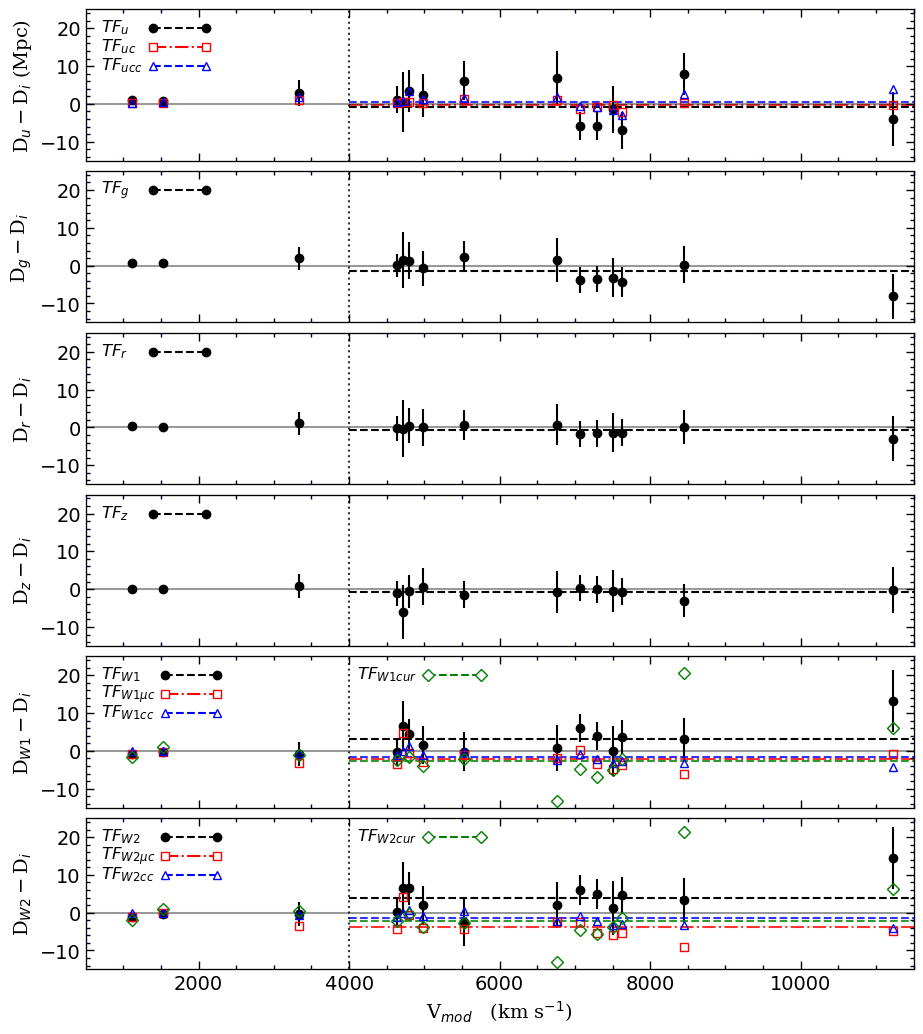

In [18]:
fig = py.figure(figsize=(9, 12), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(6,1) ; p=0

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

band1  = 'i'  # base band

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'u')
ax.set_ylabel('D'+r'$_{u}-$'+'D'+r'$_{i}$'+' (Mpc)', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)
ax.plot([1400,2100],[20,20], 'o--', color='k')
ax.text(700, 19, r'$TF_{u}$', color='k', fontsize=12)
ax.plot([1400,2100],[15,15], 's-.', color='red', mfc='white')
ax.text(700, 14, r'$TF_{uc}$', color='k', fontsize=12)
ax.plot([1400,2100],[10,10], '^--', color='blue', mfc='white')
ax.text(700, 9, r'$TF_{ucc}$', color='k', fontsize=12)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'g')
ax.set_ylabel('D'+r'$_{g}-$'+'D'+r'$_{i}$', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)
ax.plot([1400,2100],[20,20], 'o--', color='k')
ax.text(700, 19, r'$TF_{g}$', color='k', fontsize=12)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'r')
ax.set_ylabel('D'+r'$_{r}-$'+'D'+r'$_{i}$', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)
ax.plot([1400,2100],[20,20], 'o--', color='k')
ax.text(700, 19, r'$TF_{r}$', color='k', fontsize=12)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'z')
ax.set_ylabel('D'+r'$_{z}-$'+'D'+r'$_{i}$', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)
ax.plot([1400,2100],[20,20], 'o--', color='k')
ax.text(700, 19, r'$TF_{z}$', color='k', fontsize=12)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'w1')
ax.set_ylabel('D'+r'$_{W1}-$'+'D'+r'$_{i}$', fontsize=14, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)
ax.plot([1550,2250],[20,20], 'o--', color='k')
ax.text(700, 19, r'$TF_{W1}$', color='k', fontsize=12)
ax.plot([1550,2250],[15,15], 's-.', color='red', mfc='white')
ax.text(700, 14, r'$TF_{W1\mu c}$', color='k', fontsize=12)
ax.plot([1550,2250],[10,10], '^--', color='blue', mfc='white')
ax.text(700, 9, r'$TF_{W1cc}$', color='k', fontsize=12)

ax.plot([5050,5750],[20,20], 'D--', color='g', mfc='white')
ax.text(4100, 19, r'$TF_{W1cur}$', color='k', fontsize=12)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, band1, 'w2')
ax.set_ylabel('D'+r'$_{W2}-$'+'D'+r'$_{i}$', fontsize=14, fontdict=font)
ax.plot([1550,2250],[20,20], 'o--', color='k')
ax.text(700, 19, r'$TF_{W2}$', color='k', fontsize=12)
ax.plot([1550,2250],[15,15], 's-.', color='red', mfc='white')
ax.text(700, 14, r'$TF_{W2\mu c}$', color='k', fontsize=12)
ax.plot([1550,2250],[10,10], '^--', color='blue', mfc='white')
ax.text(700, 9, r'$TF_{W2cc}$', color='k', fontsize=12)

ax.plot([5050,5750],[20,20], 'D--', color='g', mfc='white')
ax.text(4100, 19, r'$TF_{W2cur}$', color='k', fontsize=12)


ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=14, fontdict=font)
plt.subplots_adjust(hspace=.07, wspace=0)

In [19]:
symcol = {}
symcol['V']  = 'black'
symcol['U']  = 'blue'
symcol['F']  = 'green'
symcol['Ce'] = 'dodgerblue'
symcol['An'] = 'olive'
symcol['Pe'] = 'darkgreen'
symcol['Hy'] = 'm'
symcol['A2'] = 'darkgoldenrod'
symcol['N41'] = 'orchid'
symcol['N5'] = 'firebrick'
symcol['Ca'] = 'sienna'
symcol['N8'] = 'slateblue'
symcol['N7'] = 'chocolate'
symcol['A1'] = 'red'
symcol['Co'] = 'maroon'
symcol['A4'] = 'deeppink'
symcol['N40']= 'magenta'
symcol['A5'] = 'crimson'
symcol['A26'] = 'purple'
symcol['He'] = 'indigo'

In [39]:


def myHubble(D, H0):
    return H0


def plotHubble(ax, band, param, Dlim = 50, labels=False):
    
#     band = 'u'
#     param = 'b'

    include_A26 = False
    if band in ['w1', 'w2'] and param in ['a','b']:
        include_A26 = True

    X  = []
    Y  = []
    Ye = []
    Ds = []
    H0s = []
    codes=[]
    for i, code in enumerate(grandClustersTable):
        myCluster = grandClustersTable[code]
        if band in myCluster:
            if param in myCluster[band]:
                Vmod = myCluster[band][param]['Vmod']
                Vmod_e = myCluster[band][param]['Vmod_e']
                Dmpc  = myCluster[band][param]['Dmpc']
                Dmpc_e = myCluster[band][param]['Dmpc_e']

                H0 = Vmod/Dmpc
                H0e = H0*np.sqrt(Vmod_e**2/Vmod**2 + Dmpc_e**2/Dmpc**2)

                if (Dmpc>Dlim and code!='A26') or (code=='A26' and include_A26==True):
    #                 print code, myCluster[band][param]['name'], Dmpc
    
                    dye = 'k'
                    if labels: dye=symcol[code]
                    ax.errorbar(Dmpc, H0, xerr=Dmpc_e, yerr=H0e, color='k', fmt='o', capsize=2, 
                            elinewidth=0.5, capthick=0.5, ms=5, mfc=dye)
                    X.append(Dmpc)
                    Y.append(H0)
                    Ye.append(H0e)
                else:
                    dye = 'k'
                    if labels: dye=symcol[code]
                    ax.errorbar(Dmpc, H0, xerr=Dmpc_e, yerr=H0e, color=dye, fmt='o', capsize=2, 
                            elinewidth=0.5, capthick=0.5, ms=5, mfc='white')   

                Ds.append(Dmpc)
                codes.append(code)
                H0s.append(H0)
    

    

    X = np.asarray(X)                
    Y = np.asarray(Y)
    Ye = np.asarray(Ye)
    fit, cov = curve_fit(myHubble, X , Y, sigma=Ye)
    H0_fit  = fit[0]
    H0e_fit = np.sqrt(cov[0])

    chi2 = np.sum(((Y-H0_fit)/Ye)**2)
    H_rms = np.sqrt(chi2/(len(X)))


    He_max = np.max([H0e_fit, H_rms])

    
    if labels:
        Ds = np.asarray(Ds)
        H0s = np.asarray(H0s)
        indx = np.argsort(Ds)
        for t, i in enumerate(indx):
            ax.text(Ds[i]-2, 52-3*(t%4), codes[i], color=symcol[codes[i]])
#             if H0s[i]>H0_fit:
#                 ax.text(Ds[i]-2, 55-3*(t%4), codes[i], color='red')
#             else: 
#                 ax.text(Ds[i]-2, 55-3*(t%4), codes[i], color='blue')            
                
                

    ax.set_xticks(np.arange(20, 180, step=40))
    ax.set_yticks(np.arange(50, 120, step=20))
    x_ax, y_ax = set_axes(ax, (0, 180), (40,120), fontsize=12)  
    y_ax.set_yticks(np.arange(50, 120, step=20))



    ax.plot([Dlim,Dlim],[40,50], ':', color='navy')
    ax.plot([Dlim,Dlim],[110,120], ':', color='navy')

    ax.plot([50,170],[H0_fit, H0_fit], 'r-')
    d = np.linspace(10,170,100)
    ax.plot(d, (H0_fit*d+200)/d, 'k:', linewidth=1)
    ax.plot(d, (H0_fit*d-200)/d, 'k:', linewidth=1)


    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.6*Xlm[0]+0.4*Xlm[1]
    y0 = 0.2*Ylm[0]+0.85*Ylm[1]
    fntsize = 12
    col = 'k'
    
    if labels:
        x0 = 0.45*Xlm[0]+0.55*Xlm[1]
        y0 = 0.1*Ylm[0]+0.9*Ylm[1] 
        fntsize = 14
        col='maroon'
    
    ax.text(x0,y0, r"$H_0 = $"+"%.2f" % H0_fit+'$\pm$'+"%.2f" % He_max,fontsize=fntsize, color=col)

    return x_ax, y_ax



Text(0,0.5,'$V_{mod}/D_i$      [km s${^{-1}}$ Mpc${^{-1}}$]    ')

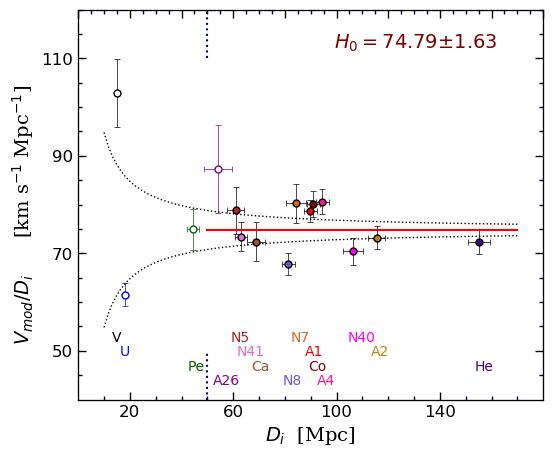

In [41]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

x_ax, y_ax = plotHubble(ax, 'i', 'a', labels=True)

ax.set_xlabel(r'$D_i$'+'  [Mpc]', fontsize=14, fontdict=font)
ax.set_ylabel(r'$V_{mod}/D_i$'+'      [km s'+r'${^{-1}}$'+' Mpc'+r'${^{-1}}$'+']    ', fontsize=14, fontdict=font)


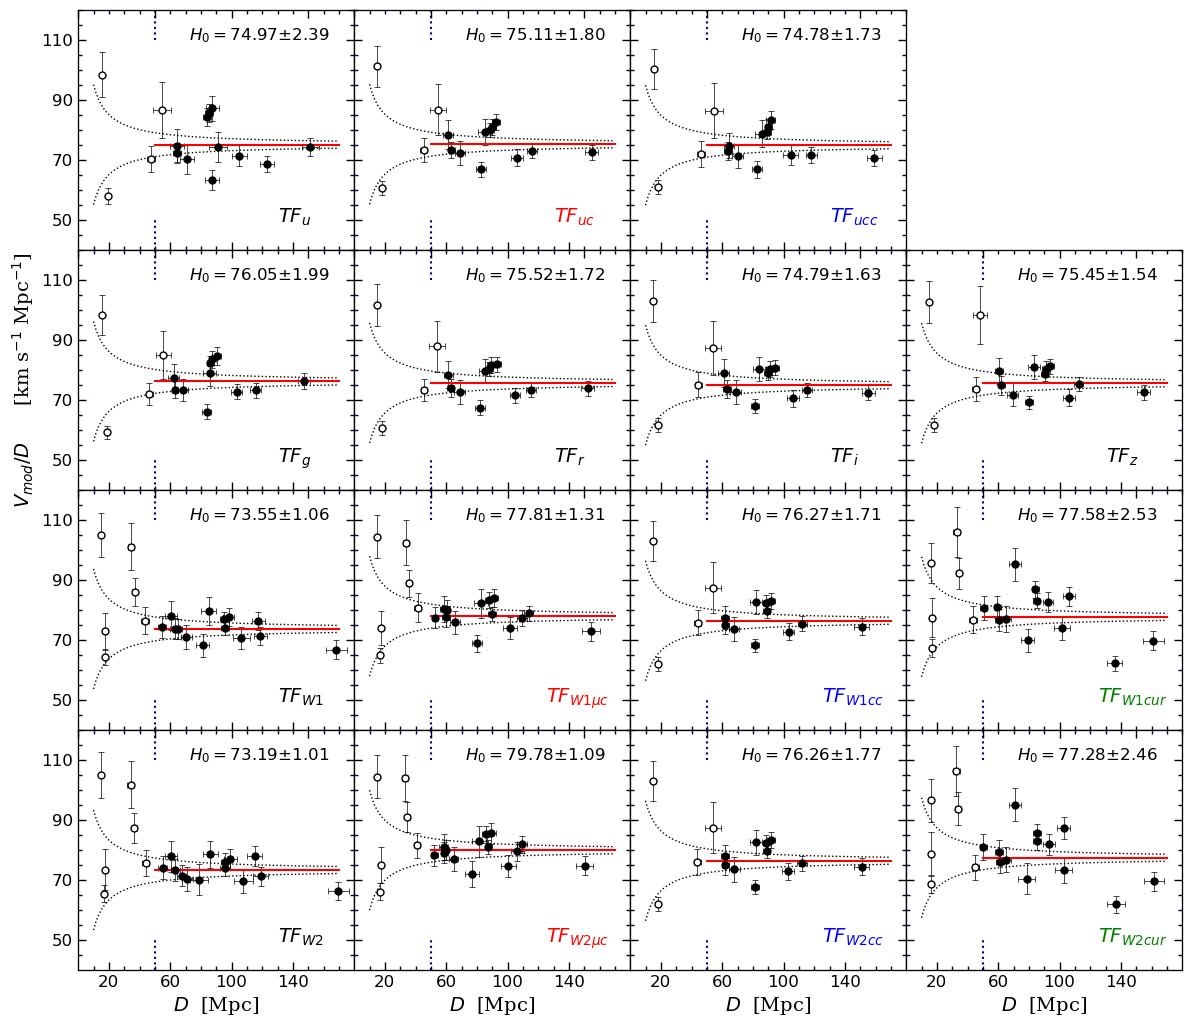

In [42]:

dye = {"u":"blue","g":"green","r":"red","i":"orange","z":"maroon","w1":"purple", 'w2': "brown"}

fig = py.figure(figsize=(12, 12), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,4) ; p=0



ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'u', 'a')
ax.text(130, 49,  r'$TF_{u}$', fontsize=14)
# ax.set_ylabel(r'$V_{mod}/D$'+' [km/s/Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'u', 'b')
ax.text(130, 49,  r'$TF_{uc}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False) 

ax = plt.subplot(gs[p]) ; p+=2
x_ax, y_ax = plotHubble(ax, 'u', 'c')
ax.text(130, 49,  r'$TF_{ucc}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False) 

###################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'g', 'a')
ax.text(130, 49,  r'$TF_{g}$', fontsize=14)
ax.set_ylabel(r'$V_{mod}/D$'+'      [km s'+r'${^{-1}}$'+' Mpc'+r'${^{-1}}$'+']    ', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'r', 'a')
ax.text(130, 49,  r'$TF_{r}$', fontsize=14)
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'i', 'a')
ax.text(130, 49,  r'$TF_{i}$', fontsize=14)
plt.setp(ax.get_yticklabels(), visible=False)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'z', 'a')
ax.text(130, 49,  r'$TF_{z}$', fontsize=14)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)
###################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'a')
ax.text(130, 49,  r'$TF_{W1}$', fontsize=14)
# ax.set_ylabel(r'$V_{mod}/D$', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'b')
ax.text(125, 49,  r'$TF_{W1\mu c}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'c')
ax.text(125, 49,  r'$TF_{W1cc}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'd')
ax.text(125, 49,  r'$TF_{W1cur}$', fontsize=14, color='g')
plt.setp(ax.get_yticklabels(), visible=False)

###################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'a')
ax.text(130, 49,  r'$TF_{W2}$', fontsize=14)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)
# ax.set_ylabel(r'$V_{mod}/D$', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'b')
ax.text(125, 49,  r'$TF_{W2\mu c}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'c')
ax.text(125, 49,  r'$TF_{W2cc}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'd')
ax.text(125, 49,  r'$TF_{W2cur}$', fontsize=14, color='g')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)


plt.subplots_adjust(hspace=0, wspace=0)

In [23]:
def Plot_compareDM(ax, band1, band2, param2, color='k'):
    param1 = 'a'

    DMs = []
    DMes = []
    for code in grandClustersTable:
        myCluster = grandClustersTable[code]
        if band1 in myCluster and band2 in myCluster:
            Vmod = myCluster[band1][param1]['Vmod']
            D1  = myCluster[band1][param1]['Dmpc']
            D1e = myCluster[band1][param1]['Dmpc_e']
            DM1  = myCluster[band1][param1]['DM']
            DM1e = myCluster[band1][param1]['DMe']            
            
            D2  = myCluster[band2][param2]['Dmpc']
            D2e = myCluster[band2][param2]['Dmpc_e']
            DM2  = myCluster[band2][param2]['DM']
            DM2e = myCluster[band2][param2]['DMe']             

            Delta_D  = D2-D1
            Delta_De = np.sqrt(D1e**2+D2e**2)
            
            Delta_DM  = DM2-DM1
            Delta_DMe = np.sqrt(DM1e**2+DM2e**2)            
            

            ax.errorbar(Vmod, Delta_DM, yerr=Delta_DMe, fmt='o', color='k', mfc=symcol[code])
            
            if Vmod>4000:
                DMs.append(Delta_DM)
                DMes.append(Delta_DMe)
                

    
    if len(DMs)>0:
        DMs  = np.asarray(DMs)
        DMes = np.asarray(DMes)
        
        DM_av  = np.sum(DMs/DMes**2) / np.sum(1./DMes**2)
        DM_ave = np.sqrt(np.sum((DMs-DM_av)**2/DMes**2) / np.sum(1./DMes**2))
       
        ax.plot([4000,20000], [DM_av,DM_av], '--', color = color)         
        
        
        
    ax.plot([-10,20000], [0,0], 'k-', alpha=0.4)
    ax.plot([4000,4000], [-100,100], 'k:', alpha=0.8)
    

    x_ax, y_ax = set_axes(ax, (500, 11500), (-0.45,0.45), fontsize=14)    
    
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.60*Xlm[0]+0.40*Xlm[1]
    y0 = 0.9*Ylm[0]+0.10*Ylm[1]
    ax.text(x0,y0, r"$\langle \Delta \/ DM \rangle = $"+"%.2f" % DM_av+'$\pm$'+"%.2f" % DM_ave+'  mag',fontsize=12, color=color)
    
    return x_ax, y_ax

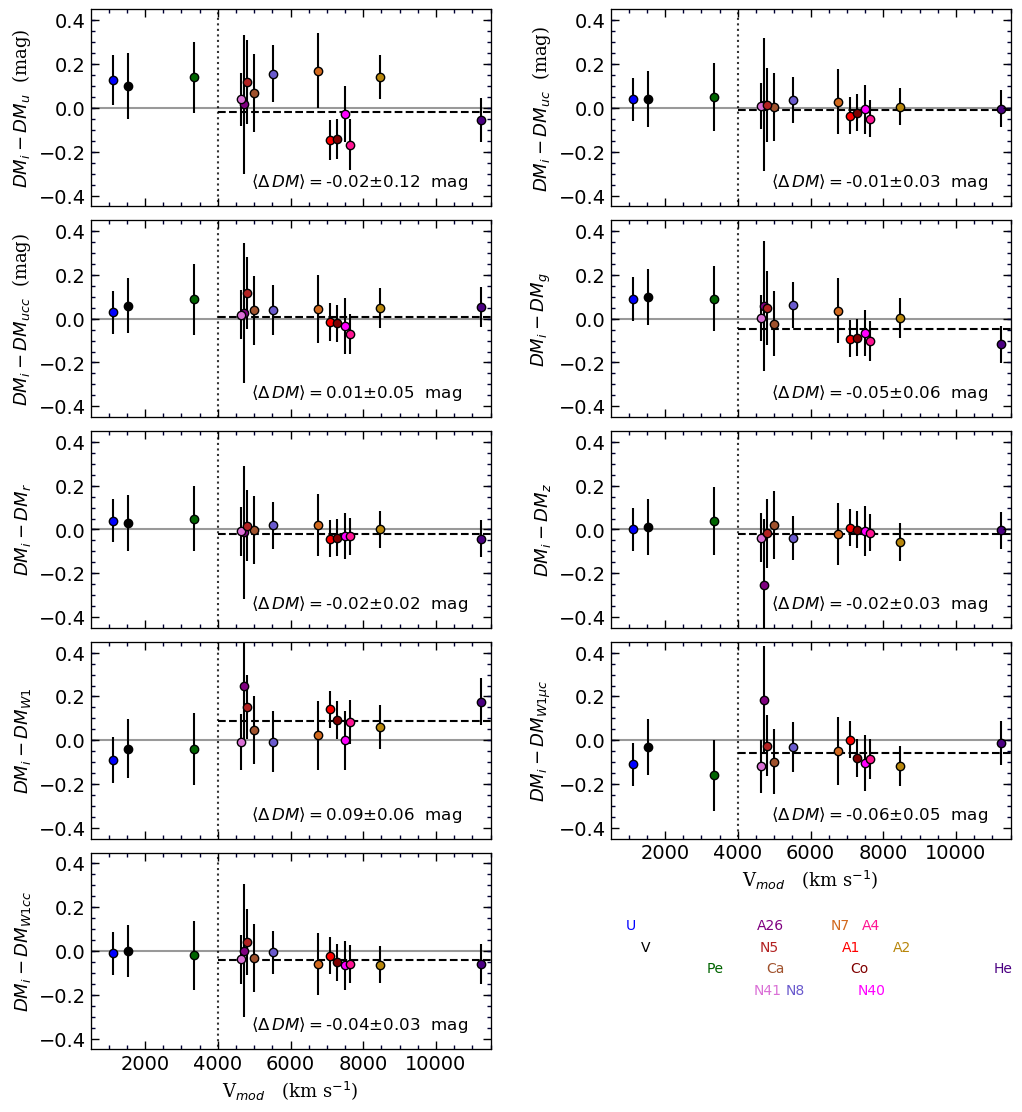

In [28]:
fig = py.figure(figsize=(10, 13), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(5,2) ; p=0


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'u', 'a', color='k')
ax.set_ylabel(r'$DM_i - DM_{u}$'+'  (mag)', fontsize=13, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'u', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_i - DM_{uc}$'+'  (mag)', fontsize=13, fontdict=font)
# ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'u', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_i - DM_{ucc}$'+'  (mag)', fontsize=13, fontdict=font)



ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'g', 'a')
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_i - DM_g$', fontsize=13, fontdict=font)





ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'r', 'a')
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_i - DM_r$', fontsize=13, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'z', 'a')
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_i - DM_z$', fontsize=13, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w1', 'a', color='k')
ax.set_ylabel(r'$DM_i - DM_{W1}$', fontsize=13, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)
# ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w1', 'b', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_i - DM_{W1\mu c}$', fontsize=13, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w1', 'c', color='k')
ax.set_ylabel(r'$DM_i - DM_{W1cc}$', fontsize=13, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = set_axes(ax, (500, 11500), (-0.45,0.45), fontsize=14)

Vmods = []
codes = []
for code in grandClustersTable:
    myCluster = grandClustersTable[code]
    if 'i' in myCluster:
        Vmod = myCluster['i']['a']['Vmod']
        Vmods.append(Vmod)
        codes.append(code)


Vmods = np.asarray(Vmods)
indx = np.argsort(Vmods)
for t, i in enumerate(indx):
    ax.text(Vmods[i]-200, 0.1-0.1*(t%4), codes[i], color=symcol[codes[i]])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
x_ax.get_xaxis().set_visible(False)
y_ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
x_ax.set_frame_on(False)
y_ax.set_frame_on(False)

plt.subplots_adjust(hspace=0.07, wspace=0.3)


Text(0.5,0,'V$_{mod}$   (km s$^{-1}$)  [this study]')

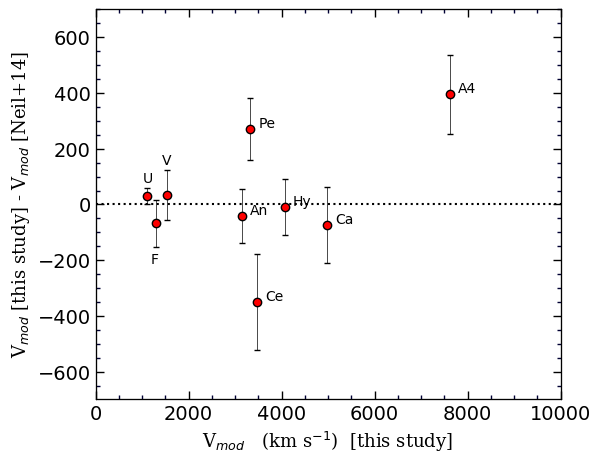

In [25]:
Neil_Vmod = {}

key = 'V'  # Virgo
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 1495.
Neil_Vmod[key]['Vmod_e'] = 37.

key = 'U'  # Ursa Major
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 1079.
Neil_Vmod[key]['Vmod_e'] = 14.

key = 'F'  # Fornax
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 1358.
Neil_Vmod[key]['Vmod_e'] = 45.

key = 'An'  # Antlia
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 3198.
Neil_Vmod[key]['Vmod_e'] = 74.

key = 'Ce'  # Centaurus
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 3823.
Neil_Vmod[key]['Vmod_e'] = 82.

key = 'Pe'  # Pegasus
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 3062.
Neil_Vmod[key]['Vmod_e'] = 78.

key = 'Hy'  # Hydra
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 4088.
Neil_Vmod[key]['Vmod_e'] = 72.


key = 'Ca'  # Cancer
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 5059.
Neil_Vmod[key]['Vmod_e'] = 82.


key = 'A4'  # A400
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 7228.
Neil_Vmod[key]['Vmod_e'] = 97.

key = 'A1367'  # 
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 6969.
Neil_Vmod[key]['Vmod_e'] = 93.


key = 'Coma'  # 
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 7370.
Neil_Vmod[key]['Vmod_e'] = 76.

key = 'A2634/66'  # 
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 8938.
Neil_Vmod[key]['Vmod_e'] = 164.

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

for code in grandClustersTable:
    
    cluster = grandClustersTable[code]['w1']['a']
    
    if code in Neil_Vmod:
        Neilcls = Neil_Vmod[code]
#         print code, cluster['Vmod'], cluster['Vmod_e'], Neilcls['Vmod'], Neilcls['Vmod_e']
        
        myV   = cluster['Vmod']
        myVe  = cluster['Vmod_e']
        NeiV  = Neilcls['Vmod']
        NeiVe = Neilcls['Vmod_e']
        
        DeltaV  = myV - NeiV
        DeltaVe = np.sqrt(myVe**2+NeiVe**2) 
        
        ax.errorbar(myV, DeltaV, xerr=myVe*0, yerr=DeltaVe, 
                    fmt='o', capsize=2, 
                    elinewidth=0.5, capthick=1, ms=6, color='k', mfc='red')
        
        if myV<2000:
            
            if code!='F':
                ax.text(myV-100, DeltaV+DeltaVe+20, code)
            
            else:
                ax.text(myV-100, DeltaV-DeltaVe-60, code)
        else:
            ax.text(myV+170, DeltaV+5, code)
        
ax.plot([10,20000],[0,0], 'k:')

x_ax, y_ax = set_axes(ax, (0, 10000), (-700,700), fontsize=14)  

ax.set_ylabel('V'+r'$_{mod}$'+ ' [this study] - V'+r'$_{mod}$'+ ' [Neil+14]', fontsize=13, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')  [this study]', fontsize=13, fontdict=font)




Text(0.5,0,'V$_{CMB}$   (km s$^{-1}$)  [this study]')

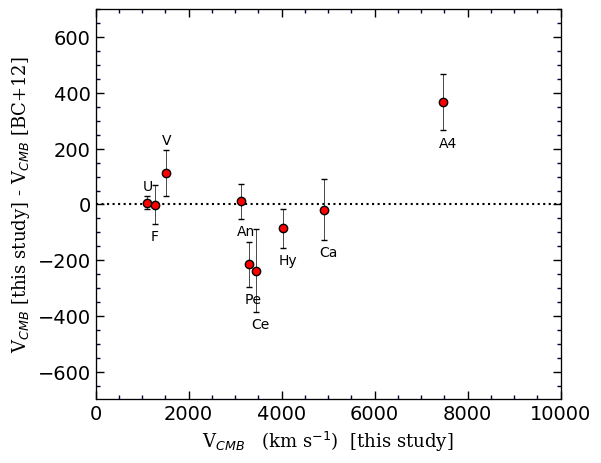

In [26]:
Brent_Vcmb = {}

key = 'V'  # Virgo
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 1410.

key = 'U'  # Ursa Major
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 1101.

key = 'F'  # Fornax
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 1286.

key = 'An'  # Antlia
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 3119.

key = 'Ce'  # Centaurus
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 3679.

key = 'Pe'  # Pegasus
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 3518.

key = 'Hy'  # Hydra
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 4121.

key = 'Ca'  # Cancer
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 4940.

key = 'A4'  # A400
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 7108.

key = 'A1367'  # 
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 6923.

key = 'Coma'  # 
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 7194.

key = 'A2634/66'  # 
Brent_Vcmb[key] = {}
Brent_Vcmb[key]['Vcmb'] = 9063.

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

for code in grandClustersTable:
    
    cluster = grandClustersTable[code]['w1']['a']
    
    if code in Brent_Vcmb:
        BrntCls = Brent_Vcmb[code]
#         print code, cluster['Vcmb'], cluster['Vcmb_e'], Neilcls['Vcmb'], Neilcls['Vcmb_e']
        
        myV     = cluster['Vcmb']
        myVe    = cluster['Vcmb_e']
        BrentV  = BrntCls['Vcmb']
        
        DeltaV  = myV - BrentV
        DeltaVe = myVe
        
        ax.errorbar(myV, DeltaV, xerr=myVe*0, yerr=DeltaVe, 
                    fmt='o', capsize=2, 
                    elinewidth=0.5, capthick=1, ms=6, color='k', mfc='red')
        
#         if myV<2000:
            
        if  code in ['V', 'U']:
                ax.text(myV-100, DeltaV+DeltaVe+20, code)
            
        else:
                ax.text(myV-100, DeltaV-DeltaVe-60, code)
#         else:
#             ax.text(myV+170, DeltaV+5, code)
        
ax.plot([10,20000],[0,0], 'k:')

x_ax, y_ax = set_axes(ax, (0, 10000), (-700,700), fontsize=14)  

ax.set_ylabel('V'+r'$_{CMB}$'+ ' [this study] - V'+r'$_{CMB}$'+ ' [BC+12]', fontsize=13, fontdict=font)
ax.set_xlabel('V'+r'$_{CMB}$'+'   (km s'+r'$^{-1}$'+')  [this study]', fontsize=13, fontdict=font)




Text(0.5,0,'V$_{mod}$   (km s$^{-1}$)  [BC+12]')

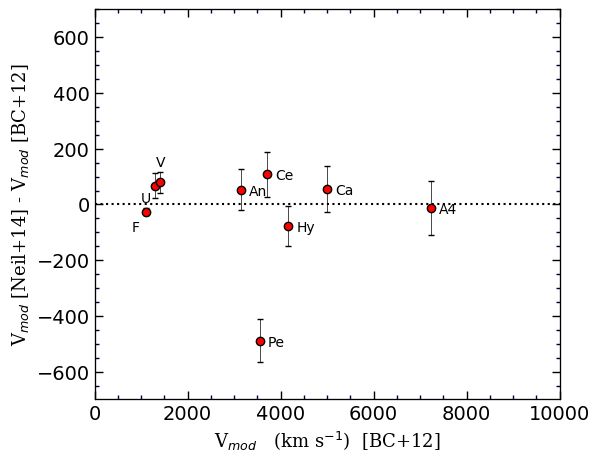

In [27]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

for code in grandClustersTable:
    
    cluster = grandClustersTable[code]['w1']['a']
    
    if code in Neil_Vmod:
        Neilcls = Neil_Vmod[code]
        NeiV  = Neilcls['Vmod']
        NeiVe = Neilcls['Vmod_e']

        BrntCls = Brent_Vcmb[code]
        BrentV  = BrntCls['Vcmb']        
        omegam=0.27
        omegal=1.-omegam
        c=299800.
        z=BrentV/c
        q0=0.5*(omegam-2.*omegal)
        fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
        BrentV=c*z*fmod
        
        
        
        
        DeltaV  = NeiV - BrentV
        DeltaVe = NeiVe
        
        ax.errorbar(BrentV, DeltaV, xerr=myVe*0, yerr=DeltaVe, 
                    fmt='o', capsize=2, 
                    elinewidth=0.5, capthick=1, ms=6, color='k', mfc='red')
        
        if BrentV<2000:
            
            if code!='F':
                ax.text(BrentV-100, DeltaV+DeltaVe+20, code)
            
            else:
                ax.text(BrentV-500, DeltaV-DeltaVe-120, code)
        else:
            ax.text(BrentV+170, DeltaV-20, code)
        
ax.plot([10,20000],[0,0], 'k:')

x_ax, y_ax = set_axes(ax, (0, 10000), (-700,700), fontsize=14)  

ax.set_ylabel('V'+r'$_{mod}$'+ ' [Neil+14] - V'+r'$_{mod}$'+ ' [BC+12]', fontsize=13, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')  [BC+12]', fontsize=13, fontdict=font)


